<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#WIDER-Datset" data-toc-modified-id="WIDER-Datset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Prepare WIDER Datset</a></span><ul class="toc-item"><li><span><a href="#Downloading-and-unzipping" data-toc-modified-id="Downloading-and-unzipping-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Downloading and unzipping</a></span></li><li><span><a href="#Creating-the-dataset" data-toc-modified-id="Creating-the-dataset-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Creating the dataset</a></span></li><li><span><a href="#Resizing-and-Showing" data-toc-modified-id="Resizing-and-Showing-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Resizing and Showing</a></span></li><li><span><a href="#Create-Grid" data-toc-modified-id="Create-Grid-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Create Grid</a></span></li></ul></li><li><span><a href="#Training-YoloV5-models" data-toc-modified-id="Training-YoloV5-models-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Training YoloV5 models</a></span></li></ul></div>

# Prepare WIDER Datset

## Downloading and unzipping

In [ ]:
!gdown "https://drive.google.com/uc?id=15hGDLhsx8bLgLcIRD5DhYt5iBxnjNF1M"   # WIDER_train.zip
!gdown "https://drive.google.com/uc?id=1GUCogbp16PMGa39thoMMeWxp7Rp5oM8Q"   # WIDER_val.zip
!gdown "https://drive.google.com/uc?id=1HIfDbVEWKmsYKJZm4lchTBDLW5N7dY5T"   # WIDER_test.zip

# If you have encountered Google Drive limitations,
# then use this soultion to download dataset files programatically.
# https://stackoverflow.com/a/67550427

In [1]:
!wget http://mmlab.ie.cuhk.edu.hk/projects/WIDERFace/support/bbx_annotation/wider_face_split.zip

--2021-11-06 21:36:17--  http://mmlab.ie.cuhk.edu.hk/projects/WIDERFace/support/bbx_annotation/wider_face_split.zip
Resolving mmlab.ie.cuhk.edu.hk (mmlab.ie.cuhk.edu.hk)... 137.189.99.12
Connecting to mmlab.ie.cuhk.edu.hk (mmlab.ie.cuhk.edu.hk)|137.189.99.12|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3591642 (3.4M) [application/zip]
Saving to: ‘wider_face_split.zip’

wider_face_split.zi 100%[===================>]   3.42M  1.32MB/s    in 2.6s    

2021-11-06 21:36:21 (1.32 MB/s) - ‘wider_face_split.zip’ saved [3591642/3591642]



In [2]:
!unzip -qx ./WIDER_train.zip
!unzip -qx ./WIDER_val.zip
!unzip -qx ./wider_face_split.zip

## Creating the dataset

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
from tqdm.notebook import tqdm
from shutil import copy, move

In [4]:
# Val Dataset
new_imgs_dir = './Yolo/images/val'
new_lbls_dir = './Yolo/labels/val'
label_text_name = './wider_face_split/wider_face_val_bbx_gt.txt'
imgs_address = './WIDER_val/images'

os.makedirs(new_imgs_dir,exist_ok = True)
os.makedirs(new_lbls_dir,exist_ok = True)
annots = open(label_text_name) 
lines = annots.readlines()
names =   [x for x in lines if 'jpg' in x]
indices = [lines.index(x) for x in names]


for n in tqdm(range(len(names[:]))):
    i = indices[n]
    name = lines[i].rstrip()
    old_img_path = os.path.join(imgs_address , name)
    name = name.split('/')[-1]
    label_path = os.path.join(new_lbls_dir , name.split('.')[0] + '.txt')
    img_path = os.path.join(new_imgs_dir , name)
    
    num_objs = int(lines[i+1].rstrip())
    bboxs = lines[i+2 : i+2+num_objs]
    bboxs = list(map(lambda x:x.rstrip() , bboxs))
    bboxs = list(map(lambda x:x.split()[:4], bboxs))
    # if len(bboxs) > 5:
    #     continue
    img = cv2.imread(old_img_path)
    img_h,img_w,_ = img.shape
    img_h,img_w,_ = img.shape
    f = open(label_path, 'w')
    count = 0 # Num of bounding box
    for bbx in bboxs:
        x1 = int(bbx[0])
        y1 = int(bbx[1])
        w = int(bbx[2])
        h = int(bbx[3])
    #     #yolo:
        x = (x1 + w//2) / img_w
        y = (y1 + h//2) / img_h
        w = w / img_w
        h = h / img_h
        if w * h * 100 > 2:
            yolo_line = f'{0} {x} {y} {w} {h}\n'
            f.write(yolo_line)
            count += 1
    f.close()
    if count > 0:   
        copy(old_img_path , img_path)
    else:
        os.remove(label_path)

  0%|          | 0/3226 [00:00<?, ?it/s]

In [5]:
# Train Dataset
new_imgs_dir = './Yolo/images/train'
new_lbls_dir = './Yolo/labels/train'
label_text_name = './wider_face_split/wider_face_train_bbx_gt.txt'
imgs_address = './WIDER_train/images'

os.makedirs(new_imgs_dir,exist_ok = True)
os.makedirs(new_lbls_dir,exist_ok = True)
annots = open(label_text_name) 
lines = annots.readlines()
names =   [x for x in lines if 'jpg' in x]
indices = [lines.index(x) for x in names]


for n in tqdm(range(len(names[:]))):
    i = indices[n]
    name = lines[i].rstrip()
    old_img_path = os.path.join(imgs_address , name)
    name = name.split('/')[-1]
    label_path = os.path.join(new_lbls_dir , name.split('.')[0] + '.txt')
    img_path = os.path.join(new_imgs_dir , name)
    num_objs = int(lines[i+1].rstrip())
    bboxs = lines[i+2 : i+2+num_objs]
    bboxs = list(map(lambda x:x.rstrip() , bboxs))
    bboxs = list(map(lambda x:x.split()[:4], bboxs))
    # if len(bboxs) > 5:
    #     continue
    img = cv2.imread(old_img_path)
    img_h, img_w, _ = img.shape
    f = open(label_path, 'w')
    count = 0 # Num of bounding box
    for bbx in bboxs:
        x1 = int(bbx[0])
        y1 = int(bbx[1])
        w = int(bbx[2])
        h = int(bbx[3])
    #     #yolo:
        x = (x1 + w//2) / img_w
        y = (y1 + h//2) / img_h
        w = w / img_w
        h = h / img_h
        if w * h * 100 > 2:
            yolo_line = f'{0} {x} {y} {w} {h}\n'
            f.write(yolo_line)
            count += 1
    f.close()
    if count > 0:   
        copy(old_img_path , img_path)
    else:
        os.remove(label_path)

  0%|          | 0/12880 [00:00<?, ?it/s]

## Resizing and Showing

In [6]:
def resize_img(input_name , output_name, target_width = 640):
    im = cv2.imread(input_name)
    h,w,_  = im.shape
    target_height = int(h / w * target_width)
    im = cv2.resize(im , (target_width , target_height), interpolation = cv2.INTER_AREA)
    cv2.imwrite(output_name , im)

def resize_all_imgs(imgs_dir):
    names = glob.glob(os.path.join(imgs_dir , '*'))
    for img in tqdm(names):
        resize_img(img, img)

In [7]:
names = glob.glob('./Yolo/images/*/*')
print(f'Threre are {len(names)} images')
names = glob.glob('./Yolo/labels/*/*')
print(f'Threre are {len(names)} label files')

Threre are 5253 images
Threre are 5253 label files


In [8]:
resize_all_imgs('./Yolo/images/*')

  0%|          | 0/5253 [00:00<?, ?it/s]

In [9]:
n = np.random.randint(0, len(names))
f = open(names[n])

lines = f.readlines()

In [10]:
lines

['0 0.45703125 0.4973913043478261 0.15625 0.2573913043478261\n']

number of bounding boxes : 1
Shape on the image : (885, 640, 3)


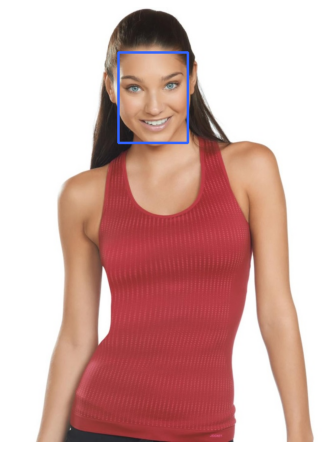

In [11]:
n = np.random.randint(0, len(names))
f = open(names[n])

lines = f.readlines()
classes = list(map(lambda x: int(x[0]), lines))
lines = list(map(lambda x:x.rstrip()[2:], lines))
objects = list(map(lambda x:(x.split()), lines))

img = cv2.imread(names[n].replace('txt','jpg').replace('labels', 'images'))
for c, bbox in zip(classes, objects):
  bbox = list(map(lambda x:float(x), bbox))
  x,y,w,h = bbox
  img_h = img.shape[0]
  img_w = img.shape[1]
  x = int(x * img_w)
  w = int(w * img_w)
  y = int(y * img_h)
  h = int(h * img_h)
  color = (255,100,50)
  cv2.rectangle(img , (int(x-w/2), int(y-h/2)), (int(x+w/2), int(y+h/2)), color , 4)
plt.figure(figsize = (8,8))
plt.imshow(img[:,:,::-1]); plt.axis('off')
print(f'number of bounding boxes : {len(classes)}')
print(f'Shape on the image : {img.shape}')

## Create Grid

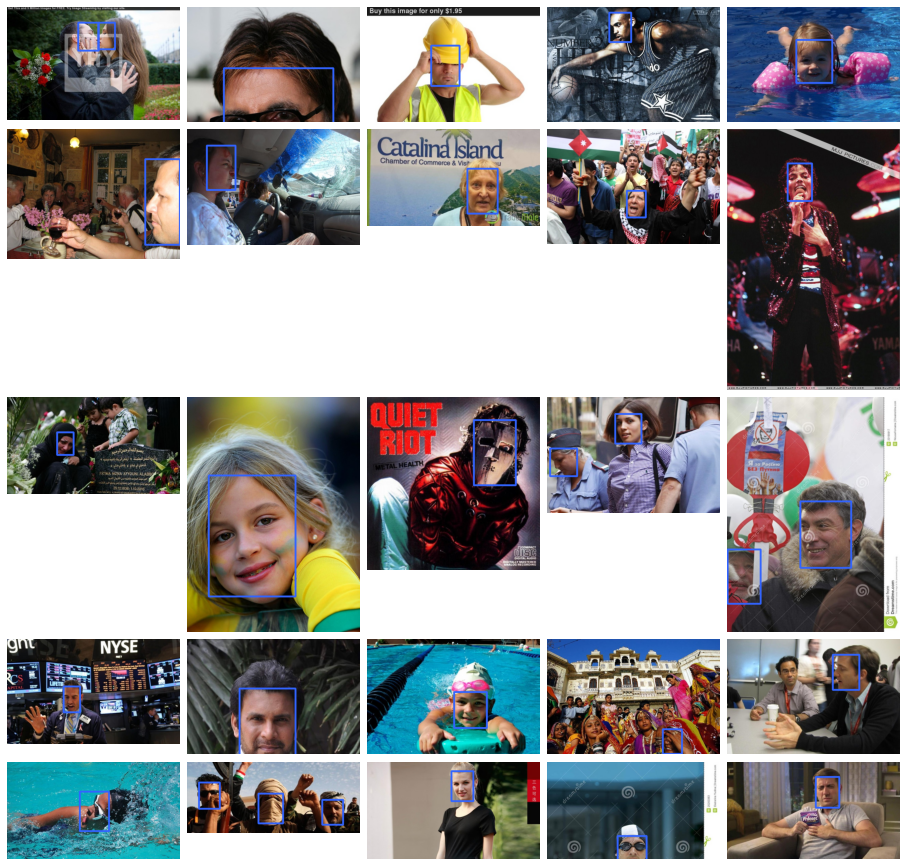

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

images = []
for _ in range(25):
    n = np.random.randint(0, len(names))
    f = open(names[n])

    lines = f.readlines()
    classes = list(map(lambda x: int(x[0]), lines))
    lines = list(map(lambda x:x.rstrip()[2:], lines))
    objects = list(map(lambda x:(x.split()), lines))

    img = cv2.imread(names[n].replace('txt','jpg').replace('labels', 'images'))
    for c, bbox in zip(classes, objects):
        bbox = list(map(lambda x:float(x), bbox))
        x,y,w,h = bbox
        img_h = img.shape[0]
        img_w = img.shape[1]
        x = int(x * img_w)
        w = int(w * img_w)
        y = int(y * img_h)
        h = int(h * img_h)
        color = (255,100,50)
        cv2.rectangle(img , (int(x-w/2), int(y-h/2)), (int(x+w/2), int(y+h/2)), color , 6)
    # plt.figure(figsize = (8,8))
    # plt.imshow(img[:,:,::-1]); plt.axis('off')
    # print(f'number of bounding boxes : {len(classes)}')
    images.append(img[:,:,::-1])
fig = plt.figure(figsize=(16., 16.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(5 ,5),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, images):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
    ax.axis('off')

plt.show()

# Training YoloV5 models

In [ ]:
import os
import glob
import torch
from IPython.display import clear_output
from IPython.display import Image, display

from tqdm.notebook import tqdm

torch.cuda.get_device_name()

In [2]:
!git clone https://github.com/ultralytics/yolov5.git
!pip install -qr /content/yolov5/requirements.txt
%cd yolov5
clear_output()  
f = open('../Yolo/dataset.yaml', 'w')
f.write('train: ../Yolo/images/train')
f.write('\nval: ../Yolo/images/val')
f.write('\nnc: {}'.format(1))
f.write("\nnames: ['Face']")

f.close()

In [3]:
from utils.plots import plot_results

In [ ]:
for model_name in tqdm(['yolov5n', 'yolov5s', 'yolov5m', 'yolov5l', 'yolov5x']):
    !python -m torch.distributed.launch --nproc_per_node 2 train.py\
        --img 640 --batch-size 16 --patience 10 --epochs 300 --device 2,3\
        --weights {model_name}.pt\
        --name {model_name}\
        --data ../Yolo/dataset.yaml --cache

    last_history = f"runs/train/{model_name}/"

    print(model_name)
    plot_results(last_history+'results.csv')
    display(Image(last_history+'results.png'))

In [13]:
for model_name in tqdm(['yolov5n', 'yolov5s', 'yolov5m', 'yolov5l', 'yolov5x']):
    print("----> Model name:", model_name)
    !python val.py\
        --img 640 \
        --weights ./runs/train/{model_name}/weights/best.pt\
        --data ../Yolo/dataset.yaml
    
    print("--------------------------------", "\n")

  0%|          | 0/5 [00:00<?, ?it/s]

----> Model name: yolov5n
val: data=../Yolo/dataset.yaml, weights=['./runs/train/yolov5n/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=val, device=, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False
YOLOv5 🚀 v6.0-74-gb8f979b torch 1.10.0+cu102 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

Fusing layers... 
Model Summary: 213 layers, 1760518 parameters, 0 gradients, 4.2 GFLOPs
val: Scanning '../Yolo/labels/val.cache' images and labels... 1055 found, 0 miss
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all       1055       1410        0.9      0.908       0.95      0.711
Speed: 0.1ms pre-process, 1.1ms inference, 1.7ms NMS per image at shape (32, 3, 640, 640)
Results saved to runs/val/exp
-------------------------------- 

----> Model name: yolov5s
val: data=../Yolo/dataset.yaml, we